
# 📘 Introduction to `igraph` in Python


**Topic:** *Advanced Graph Analysis with igraph*  
**Professor:** *Dr. Ashkezari*  
**Prepared by:** *Amirmahdi Kharparvar*  
**Ferdowsi University of Mashhad**  

---

## **1. Introduction**
Graphs represent relationships among entities.  
The **`igraph`** library in Python provides efficient tools for creating, analyzing, and visualizing networks.

---

## **2. What is `igraph`?**
`igraph` is an open-source library (Python, R, C) for **complex network analysis**.

### **Key Features**
- High performance (C backend)
- Supports directed/undirected graphs
- Many built-in algorithms (shortest paths, centrality, communities)
- Integrated visualization
- Interoperable with NetworkX and Gephi

---

## **3. Installation**
```bash
pip install python-igraph
pip install cairo   # for visualization
```

---

## **4. Basic Graph Creation**


IGRAPH UN-- 4 4 -- 
+ attr: name (v)


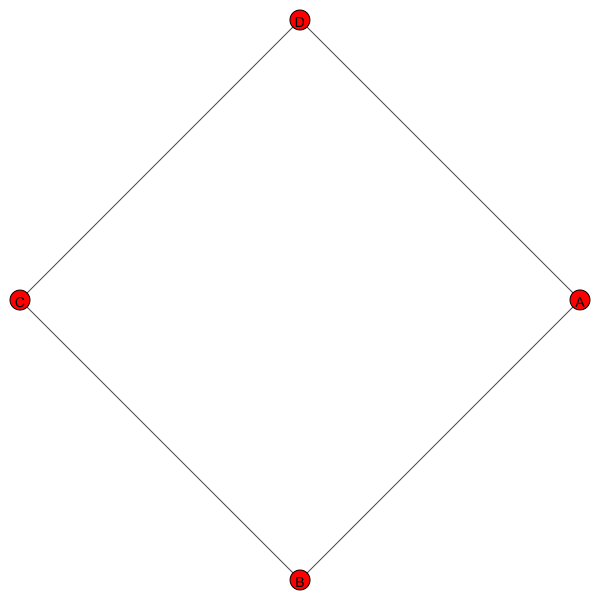

In [82]:

from igraph import Graph, plot

# Create an undirected graph
g = Graph(edges=[(0,1), (1,2), (2,3), (3,0)], directed=False)
g.vs["name"] = ["A", "B", "C", "D"]

print(g.summary())
plot(g, vertex_label=g.vs["name"])



---

## **5. Core Concepts**
| Concept | Description |
|----------|-------------|
| Vertex | Entity (node) |
| Edge | Connection between vertices |
| Directed Graph | Edges have direction |
| Weighted Graph | Edges have weights |
| Degree | Number of connections per vertex |

---

## **6. Adding Attributes**


IGRAPH UNW- 4 4 -- Simple Graph
+ attr: name (g), age (v), name (v), weight (e) 
Degree of A is: 2
Vertex A has age 25
Vertex B has age 30
Vertex C has age 35
Vertex D has age 40
Edge (0, 1) has weight 1.0
Edge (1, 2) has weight 2.5
Edge (2, 3) has weight 0.9
Edge (0, 3) has weight 3.2


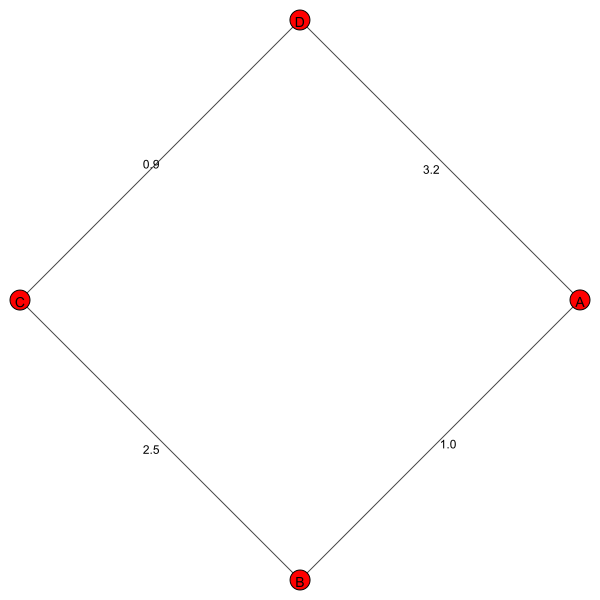

In [83]:

g["name"] = "Simple Graph"
g.vs["age"] = [25, 30, 35, 40]
g.es["weight"] = [1.0, 2.5, 0.9, 3.2]

print(g.summary(), f"\nDegree of A is: {g.degree("A")}")

for v in g.vs:
    print(f"Vertex {v['name']} has age {v['age']}")

for e in g.es:
    print(f"Edge {e.tuple} has weight {e['weight']}")

plot(g, vertex_label=g.vs["name"], edge_label=g.es["weight"])



---

## **7. Common Methods**
| Method | Description |
|---------|-------------|
| `Graph()` | Create a new empty Graph or from edges/adjacency. |
| `add_vertices()` | Add one or more vertices to the graph. |
| `add_edges()` | Add one or more edges (pairs of vertex indices/names). |
| `vs, es` | VertexSeq and EdgeSeq objects — access and set attributes. |
| `summary()` | Short textual summary of the graph (n,m,directed?). |
| `degree()` | Return vertex degrees (in/out/total). |
| `neighbors()` | Return neighbors of a vertex. |
| `shortest_paths()` | Compute shortest-path distances (supports weights). |
| `get_shortest_paths()` | Get vertices (or edges) composing shortest paths. |
| `betweenness()` | Betweenness centrality for vertices or edges. |
| `closeness()` | Closeness centrality for vertices. |
| `eigenvector_centrality()` | Eigenvector centrality (similar to PageRank). |
| `pagerank()` | PageRank scores for vertices. |
| `community_multilevel()` | Louvain method for community detection. |
| `community_infomap()` | Infomap community detection. |
| `community_label_propagation()` | Label propagation for communities. |
| `cluster_walktrap()` | Walktrap community detection (random walks). |
| `diameter()` | Graph diameter (longest shortest-path). |
| `average_path_length()` | Average of shortest path lengths (optionally weighted). |
| `density()` | Edge density: m / n(n-1) (or directed variant). |
| `is_connected()` | Check if graph is (weakly) connected. |
| `decompose()` | Decompose graph into connected components (subgraphs). |
| `subgraph()` | Return induced subgraph on a set of vertices. |
| `degree_distribution()` | Return degree distribution histogram-like object. |
| `count_triangles()` | Count triangles in the graph. |
| `transitivity_undirected()` | Global clustering coefficient (transitivity). |
| `assortativity_degree()` | Degree assortativity (tendency of nodes to connect to similar-degree nodes). |
| `coreness()` | Compute k-core number for each vertex. |
| `motifs_randesu()` | Count motifs of a given size (small subgraph patterns). |
| `maxflow()` | Max flow between source and target (on weighted graphs). |
| `minimum_spanning_tree()` | Minimum spanning tree for weighted graphs. |
| `layout()` | Compute/layout positions (fruchterman_reingold, kamada_kawai, circle, etc.). |
| `plot()` | Plot the graph using cairo backend. |
| `write_graphml(), Read_GraphML()` | Write/read GraphML files. |
| `to_networkx(), from_networkx()` | Interoperability with NetworkX graphs. |
| `simplify()` | Remove self-loops and/or multiple edges. |
| `isomorphic(), get_isomorphism_vf2()` | Graph isomorphism checks and VF2 mapping. |
| `adjacency(), get_adjacency()` | Access adjacency matrix. |
| `degree(), indegree(), outdegree()` | Degree variants for directed graphs. |
| `es.select(), vs.select()` | Select edges/vertices by attribute or predicate. |

---

## **8. Example: Social Network**


IGRAPH UN-- 5 6 -- 
+ attr: name (v)


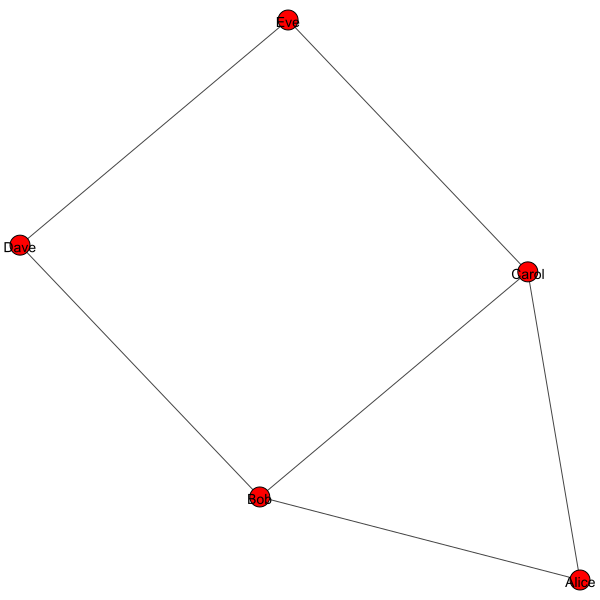

In [84]:

friends = Graph(directed=False)
friends.add_vertices(["Alice", "Bob", "Carol", "Dave", "Eve"])
friends.add_edges([
    ("Alice", "Bob"),
    ("Alice", "Carol"),
    ("Bob", "Carol"),
    ("Bob", "Dave"),
    ("Carol", "Eve"),
    ("Dave", "Eve")
])

print(friends.summary())
plot(friends, vertex_label=friends.vs["name"])



---

## **9. Analyzing the Graph**


In [85]:

print("Degrees:", friends.degree())
print("Betweenness:", friends.betweenness())
print("Average path length:", friends.average_path_length())
print("Diameter:", friends.diameter())


Degrees: [2, 3, 3, 2, 2]
Betweenness: [0.0, 1.5, 1.5, 0.5, 0.5]
Average path length: 1.4
Diameter: 2



---

## **10. Community Detection**


Number of communities: 2
Membership: [0, 0, 0, 1, 1]


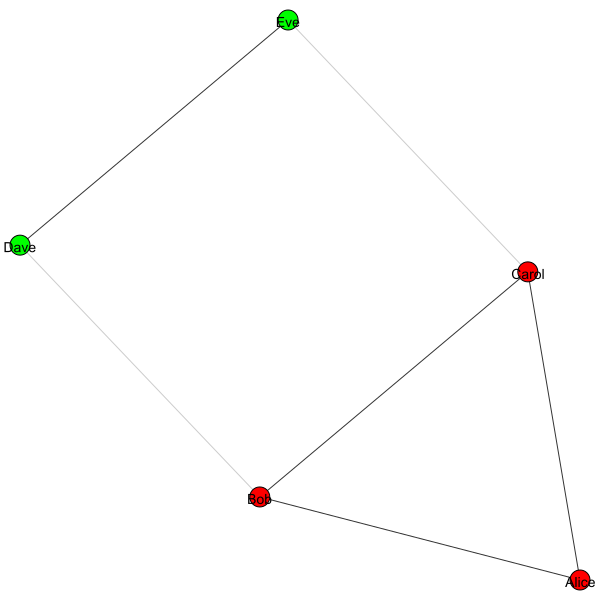

In [86]:

communities = friends.community_multilevel()
print("Number of communities:", len(communities))
print("Membership:", communities.membership)
plot(communities, vertex_label=friends.vs["name"])



---

## **11. Visualization Layouts**
- `layout_circle`
- `layout_fruchterman_reingold`
- `layout_kamada_kawai`


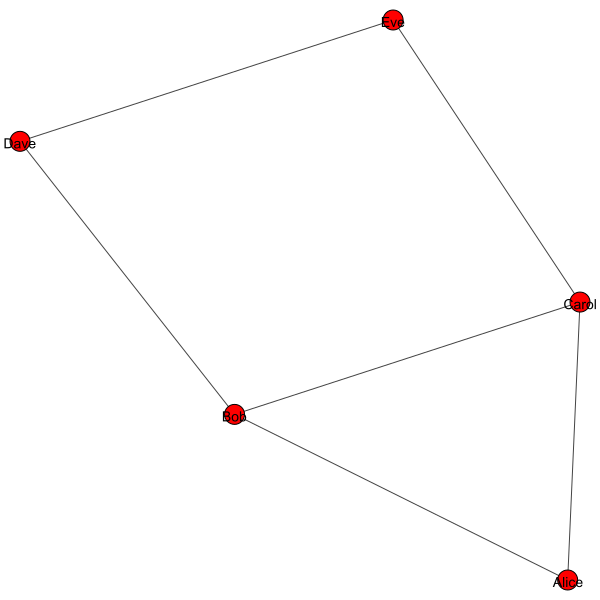

In [97]:

layout = friends.layout("fruchterman_reingold")
plot(friends, layout=layout, vertex_label=friends.vs["name"])



---

## **12. Comparison: igraph vs NetworkX**
| Feature | `igraph` | `NetworkX` |
|----------|-----------|------------|
| Speed | ✅ Faster | ❌ Slower |
| Scalability | ✅ Handles large graphs | ⚠ Medium scale |
| Visualization | ✅ Built-in | ⚠ Needs extra libs |
| Ease of use | ⚠ Steeper learning curve | ✅ Easier |

---

## **13. Real-World Applications**
- Social Networks  
- Transportation Systems  
- Biological Pathways  
- Recommendation Engines  
- Knowledge Graphs  

---

## **14. Strengths & Weaknesses**
### ✅ Strengths
- Extremely fast
- Many algorithms
- Handles large datasets
- Cross-platform

### ❌ Weaknesses
- Complex syntax
- Limited plot styling
- Smaller community than NetworkX

---

## **15. Conclusion**
`igraph` is a robust, efficient tool for graph analysis and visualization, ideal for research and complex network problems.

---

## **16. Real-World code example**


Nodes: 280 Edges: 1315
Louvain communities: 5
Infomap communities: 5
Label-propagation communities: 7


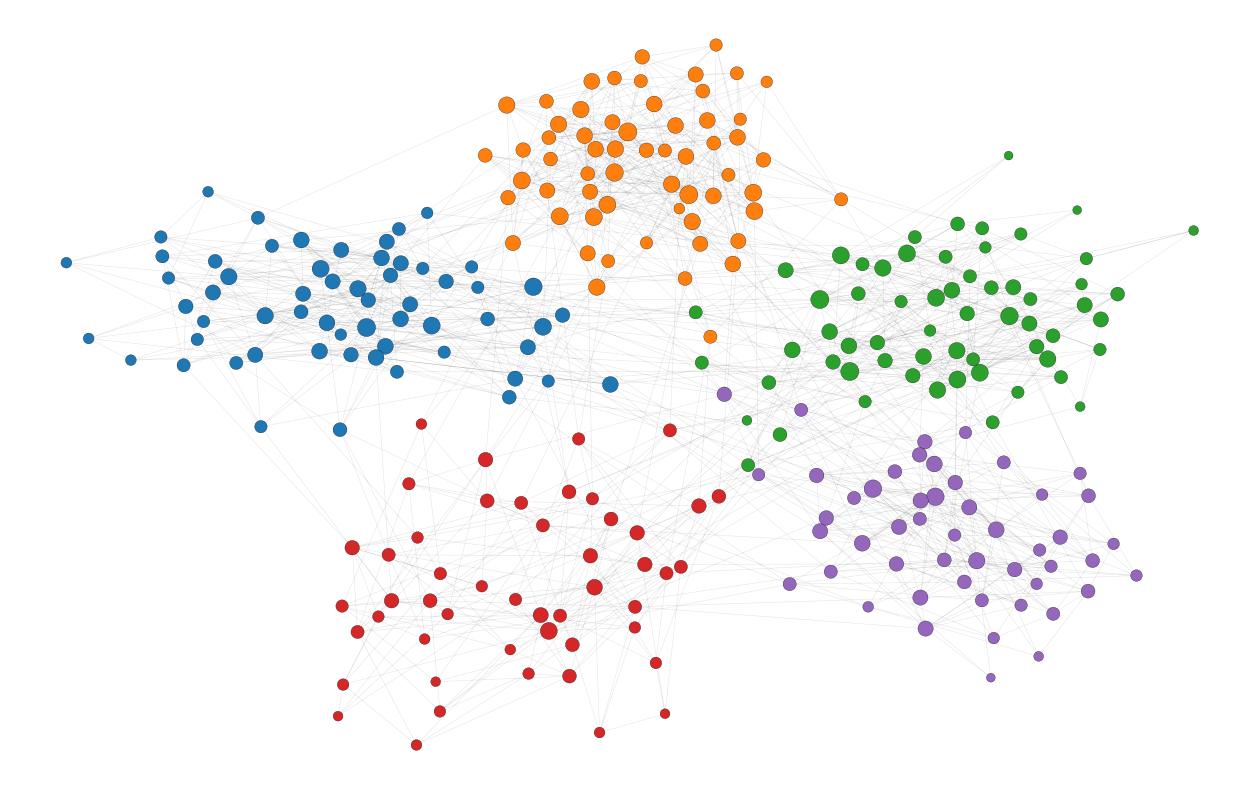

In [122]:
# crowded_graph_for_community_detection.py
import random
from igraph import Graph, plot
import matplotlib.pyplot as plt

# safe_plot helper (matplotlib fallback)
def safe_plot(g, layout_name="fruchterman_reingold", vertex_label=None, figsize=(10,10),
              vertex_color=None, vertex_size=None, edge_alpha=0.2, show=True):
    try:
        layout = g.layout(layout_name)
    except Exception:
        layout = g.layout("fruchterman_reingold")
    coords = [tuple(pos) for pos in layout]
    xs = [c[0] for c in coords]
    ys = [c[1] for c in coords]

    plt.figure(figsize=figsize)
    # draw edges
    for idx, e in enumerate(g.es):
        a, b = e.tuple
        plt.plot([coords[a][0], coords[b][0]], [coords[a][1], coords[b][1]],
                 linewidth=0.4, alpha=edge_alpha, color='black', zorder=1)

    # node sizes
    if vertex_size is None:
        degs = g.degree()
        sizes = [50 + 5*d for d in degs]
    else:
        sizes = vertex_size

    # node colors
    if vertex_color is None:
        colors = ['C{}'.format(c % 10) for c in g.vs['community']]
    else:
        colors = vertex_color

    plt.scatter(xs, ys, s=sizes, c=colors, zorder=2, edgecolors='k', linewidths=0.2)

    # labels
    if vertex_label is None:
        labels = None
    elif isinstance(vertex_label, str) and vertex_label in g.vs.attribute_names():
        labels = g.vs[vertex_label]
        for i, (x, y) in enumerate(coords):
            plt.text(x, y, str(labels[i]), fontsize=6, ha='center', va='center', zorder=3)
    elif isinstance(vertex_label, list):
        for i, (x, y) in enumerate(coords):
            plt.text(x, y, str(vertex_label[i]), fontsize=6, ha='center', va='center', zorder=3)

    plt.axis('off')
    if show:
        plt.show()


# 1) Create a stochastic-block-model graph (clear communities)
n_communities = 5
sizes = [60, 60, 60, 50, 50]   # total ~280 nodes (crowded)
p_in = 0.15   # intra-community edge probability (relatively dense)
p_out = 0.005  # inter-community probability (sparse)

# build preference matrix
pref = [[p_in if i==j else p_out for j in range(n_communities)] for i in range(n_communities)]
g = Graph.SBM(sum(sizes), pref_matrix=pref, block_sizes=sizes, directed=False, loops=False)

# assign community ground-truth attribute (block membership)
membership = []
for idx, size in enumerate(sizes):
    membership += [idx]*size
g.vs['gt_community'] = membership

# add some weight noise and some extra random edges to make it "shuffled but structured"
for e in g.es:
    e['weight'] = round(random.uniform(0.5, 3.0), 2)
# add a fraction of random edges to increase "noise"
num_extra = int(0.02 * g.ecount())
for _ in range(num_extra):
    a = random.randrange(g.vcount())
    b = random.randrange(g.vcount())
    if a != b and not g.are_adjacent(a, b):
        g.add_edges([(a, b)])
        g.es[-1]['weight'] = round(random.uniform(0.5,3.0), 2)

print("Nodes:", g.vcount(), "Edges:", g.ecount())

# 2) detect communities with multiple algorithms
louvain = g.community_multilevel(weights=g.es['weight'])
infomap = g.community_infomap(edge_weights=g.es['weight'])
labelp = g.community_label_propagation(weights=g.es['weight'])

print("Louvain communities:", len(louvain))
print("Infomap communities:", len(infomap))
print("Label-propagation communities:", len(labelp))

# 3) choose one membership to color nodes (compare with ground truth)
######
g.vs['community'] = louvain.membership  # use louvain membership for coloring

# 4) layout that tends to separate communities better
layout = g.layout_fruchterman_reingold(weights=None, niter=500, grid=False)  # longer niter -> better separation

# 5) draw using safe_plot; show node size by degree and transparency for edges
deg = g.degree()
sizes = [10 + 10*d for d in deg]
colors = ['C{}'.format(c % 10) for c in g.vs['community']]

safe_plot(g, layout_name=layout, vertex_label=None, figsize=(16,10),
          vertex_color=colors, vertex_size=sizes, edge_alpha=0.1)
